In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
# produce matlab-style plots
import matplotlib as mpl
import pickle
import os
import matplotlib.ticker as mtick

# increase font size on plots
mpl.rc('font',**{'size':12})

In [2]:
f = open("LNP_graphing_data.pickle","rb")
# z_ints2,e_ints1,m_ints1 = pickle.load(f,encoding='latin1')
e_ints1,m_ints1 = pickle.load(f,encoding='latin1')
f.close()

# plot delay and gain

- e_ints1: emg data
- m_ints1: manual data

first axis is [visual gain, visual delay, feedback gain, feedback delay]

second axis is [5th, 9th percentile]

In [5]:
# rearrange data to ([manual and emg] x [5th, 50th, 95th percentile])
vis_delay = np.vstack([[m_ints1[1][0],np.mean(m_ints1[1]),m_ints1[1][1]],
                       [e_ints1[1][0],np.mean(e_ints1[1]),e_ints1[1][1]]])*1000
vis_gain = np.vstack([[m_ints1[0][0],np.mean(m_ints1[0]),m_ints1[0][1]],
                       [e_ints1[0][0],np.mean(e_ints1[0]),e_ints1[0][1]]]) 
fb_delay = np.vstack([[m_ints1[3][0],np.mean(m_ints1[3]),m_ints1[3][1]],
                       [e_ints1[3][0],np.mean(e_ints1[3]),e_ints1[3][1]]])*1000
fb_gain = np.vstack([[m_ints1[2][0],np.mean(m_ints1[2]),m_ints1[2][1]],
                       [e_ints1[2][0],np.mean(e_ints1[2]),e_ints1[2][1]]]) 

In [6]:
np.hstack([vis_delay[:,1]-vis_delay[:,0],fb_delay[:,1]-fb_delay[:,0]])

array([0.1939144 , 0.18955194, 0.33918069, 0.18409262])

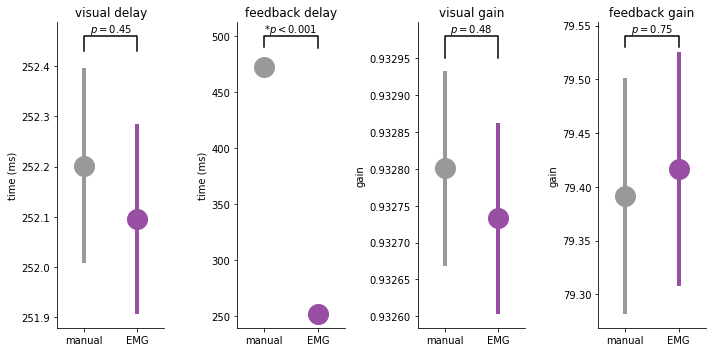

In [8]:
# PLOT DELAY
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
markersize = 20
titles=['visual delay','feedback delay','visual gain', 'feedback gain']
yaxis = ['time (ms)','time (ms)','gain','gain']
data = [vis_delay,fb_delay,vis_gain,fb_gain]
xx = np.arange(1,3,1)
# plt.errorbar(xx,np.hstack([vis_delay[:,1],fb_delay[:,1]]),
#              np.hstack([vis_delay[:,1]-vis_delay[:,0],fb_delay[:,1]-fb_delay[:,0]]), 
#              linestyle='None', marker='^')
fig,axs = plt.subplots(1,4,sharex=True,sharey=False,figsize=(10,5))
plt.setp(axs, xticks=[1,2], xticklabels=['manual','EMG'])
plt.xlim((0.5,2.5))
# plot visual delay
for ix,ax in enumerate(axs):
    ax.errorbar(xx[0],data[ix][:,1][0],yerr=data[ix][:,1][0]-data[ix][:,0][0], 
                 fmt='o',markersize=markersize,linewidth=4,color=CB_color_cycle[6])
    ax.errorbar(xx[1],data[ix][:,1][1],yerr=data[ix][:,1][1]-data[ix][:,0][1], 
                 fmt='o',markersize=markersize,linewidth=4,color=CB_color_cycle[5])
    ax.set_title(titles[ix])
#     if ix == 0 or ix == 2:
    ax.set_ylabel(yaxis[ix])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
# plot pvalue 
y1 = .25243*1000
pos1 = 1
pos2 = 2
linewidth = 2
axs[0].plot([pos1,pos1,pos2,pos2],[y1,y1+.03,y1+.03,y1],lw=1.5,c='k')
# axs[0].plot([pos1,pos1,pos2,pos2],[y1,y1,y1,y1],lw=1.5,c='k')
axs[0].text((pos1+pos2)*.5,y1+.03,r'$p=0.45$',ha='center',va='bottom',color='k')
# axs[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))


y1 = .49*1000
pos1 = 1
pos2 = 2
linewidth = 2
dist = 0.01*1000
axs[1].plot([pos1,pos1,pos2,pos2],[y1,y1+dist,y1+dist,y1-.2],lw=1.5,c='k')
axs[1].text((pos1+pos2)*.5,y1+dist,r'$*p<0.001$',ha='center',va='bottom',color='k',weight='bold')
# axs[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

y1 = .93295
pos1 = 1
pos2 = 2
linewidth = 2
dist = 0.00003
axs[2].plot([pos1,pos1,pos2,pos2],[y1,y1+dist,y1+dist,y1],lw=1.5,c='k')
axs[2].text((pos1+pos2)*.5,y1+dist,r'$p=0.48$',ha='center',va='bottom',color='k')
# axs[2].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))


y1 = 79.53
pos1 = 1
pos2 = 2
linewidth = 2
dist = 0.01
axs[3].plot([pos1,pos1,pos2,pos2],[y1-0.0003,y1+dist,y1+dist,y1],lw=1.5,c='k')
axs[3].text((pos1+pos2)*.5,y1+dist,r'$p=0.75$',ha='center',va='bottom',color='k')
# axs[3].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))


plt.tight_layout()

fname = 'EMGdelay_varsplot'
if fname is not None:
    fig = plt.gcf()
if not(os.path.exists('pdf')): 
    os.mkdir('pdf')
fig.savefig(os.path.join('pdf',fname+'.'+'pdf'),bbox_inches='tight',pad_inches=0)